# Ford Gobike Data Analysis

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# read the CSV file
ford_df=pd.read_csv('fordgobike_tripdata.csv')
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# asses data
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
ford_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
ford_df.duplicated().sum()

0

In [6]:
ford_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

I'll drop rows with missing values as they can cause problems in the analysis process.

In [7]:
ford_df=ford_df.dropna()

In [8]:
np.sum(ford_df.isnull()).sum()

0

In [9]:
ford_df.shape[0]

174952

# The structure of the dataset:
After dropping rows with missing values, the dataset contains 15 features (columns) and 174952 entries (rows).

### The main questions I want to answer:
-what is the average trip duration range?

-what are the days of the week with highest and lowest number of trips?

-what is the average age of members?

-what is average age per customers and subscribers?

-what is the ratio between different genders as customers ad subscribers?

-what is the average trip duration per customers compared to subscribers, and who takes more time in average?



# Univariate exploration:
I'll look at the main feature of interest, that's trip duration. but first, I'll convert seconds to minutes in the duration_sec column and store the result in another column.

In [10]:
ford_df['duration_min']=ford_df['duration_sec']/60
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333


Now I'll look at the distribution of trip duration in the dataset.

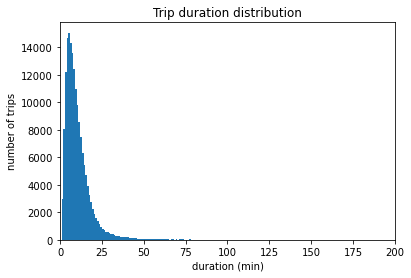

In [11]:
bins=np.arange(0,ford_df.duration_min.max()+1,1)
plt.hist(data=ford_df,x='duration_min',color=sb.color_palette()[0],bins=bins)
plt.xlim([0,200])
plt.ylabel('number of trips')
plt.xlabel('duration (min)')
plt.title('Trip duration distribution');

Since the distribution is very skewed to the right, I should scale the x axis.

I will create a function to scale the trip duration variable since it will be used frequently in the analysis.

In [12]:
def duration_scale(axis):
    ticks=[1 , 3, 10, 30, 100, 300, 1000]
    if axis=='x':
        plt.xscale('log')
        plt.xticks(ticks,ticks)
    else:
        plt.yscale('log')
        plt.yticks(ticks,ticks)

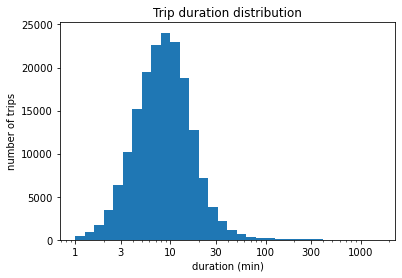

In [13]:
bins=10**np.arange(0,np.log10(ford_df.duration_min.max())+.1,.1)
plt.hist(data=ford_df,x='duration_min',color=sb.color_palette()[0],bins=bins)
duration_scale("x")
plt.xlabel('duration (min)')
plt.ylabel('number of trips')
plt.title('Trip duration distribution');

In [14]:
ford_df.query('duration_min<=25 and duration_min>=5').shape[0]

127861

The distribution shows that most trips take approximately 5-25 minutes.

Next, I'll answer the question about the days of the week with the most and least trips, but to answer this question, I need to extract days from the start_time column.

In [15]:
# source: https://www.geeksforgeeks.org/python-pandas-series-dt-strftime/
# source: https://www.journaldev.com/23365/python-string-to-datetime-strptime 
ford_df.start_time = pd.to_datetime(ford_df.start_time)
ford_df['day'] = ford_df.start_time.dt.strftime('%a')
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,Thu
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,Thu


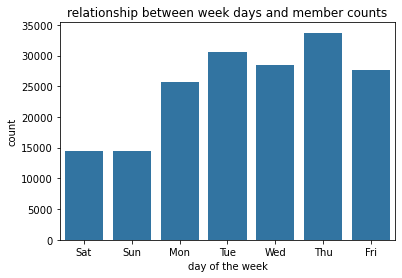

In [16]:
sb.countplot(data=ford_df,x='day',order=['Sat','Sun','Mon','Tue','Wed','Thu','Fri'],color=sb.color_palette()[0])
plt.xlabel('day of the week')
plt.title('relationship between week days and member counts');

As shown in the bar chart, the day of the week with the most number of trips is thursday, interestingly the days with the least numbers of trips are saturday and sunday. This might indicate that more than half of the trips are work related. since in the weekends the number of trips drops significantly (by approximately half of the total average).

Now I'll try to answer another question, which is the difference between customers and subscribers in numbers.

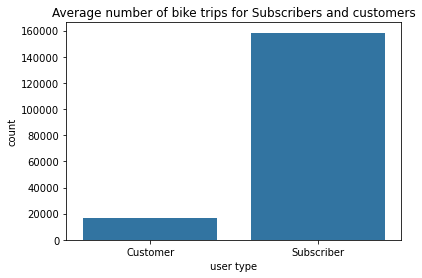

In [17]:
sb.countplot(data=ford_df,x='user_type',color=sb.color_palette()[0])
plt.title('Average number of bike trips for Subscribers and customers')
plt.xlabel('user type');

This bar chart shows that most members in the datasets are subscribers.
Now let's see the age distribiution of members, but first I'll calculate the age of members in a new column "age".

In [18]:
ford_df['age']=2021-ford_df['member_birth_year']

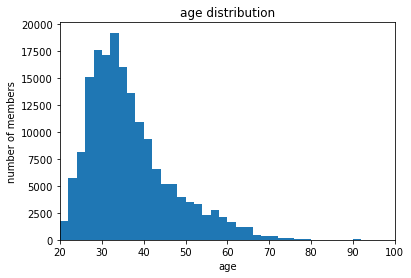

In [19]:
bins=np.arange(20,ford_df.age.max()+2,2)
plt.hist(data=ford_df,x='age',color=sb.color_palette()[0],bins=bins);
plt.xlim([20,100])
plt.xlabel('age');
plt.ylabel('number of members')
plt.title('age distribution');

Looks like most members are between the age of 25-40.

## Bivariate exploration:

let's take a look at the average age per customers and subscribers using box plots.

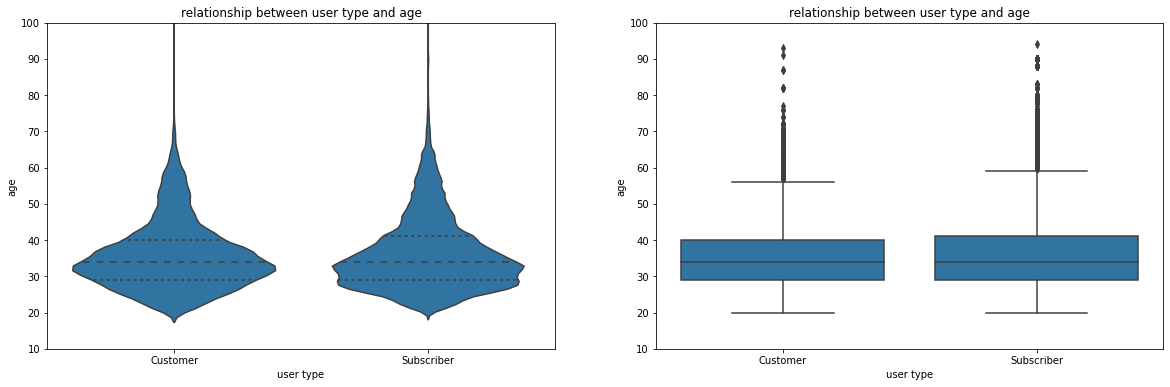

In [20]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sb.violinplot(data=ford_df,x='user_type',y='age',color=sb.color_palette()[0],inner='quartile')
plt.ylim(10,100)
plt.xlabel('user type')
plt.title('relationship between user type and age')
plt.subplot(1,2,2)
sb.boxplot(data=ford_df,x='user_type',y='age',color=sb.color_palette()[0])
plt.ylim(10,100)
plt.xlabel('user type')
plt.title('relationship between user type and age');

These plots suggest that most members either customers or subscribers, are between the age of 27-40

Now let's see the relationship between age and trip duration in minutes using a heat map.

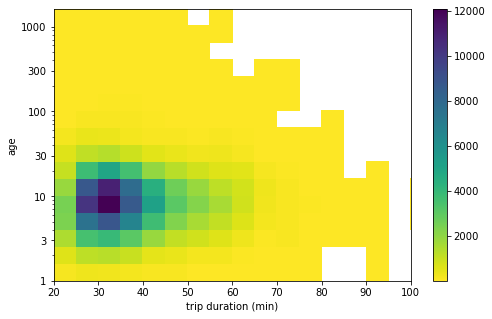

In [21]:
x_bins=np.arange(ford_df.age.min(),ford_df.age.max()+5,5)
y_bins=10**np.arange(np.log10(ford_df.duration_min.min()),np.log10(ford_df.duration_min.max())+.2,.2)
plt.figure(figsize=[8,5])
plt.hist2d(data=ford_df,x='age',y='duration_min',cmin=.5,cmap='viridis_r',bins=[x_bins,y_bins])
duration_scale("y")
plt.xlim([20,100])
plt.colorbar()
plt.xlabel('trip duration (min)')
plt.ylabel("age");

This heat map shows that most members are between the age of 25-40 and they take around 5-25 minutes in their trips.

let's find out the average trip duration among customers compared to subscribers using box plots and violin plots.

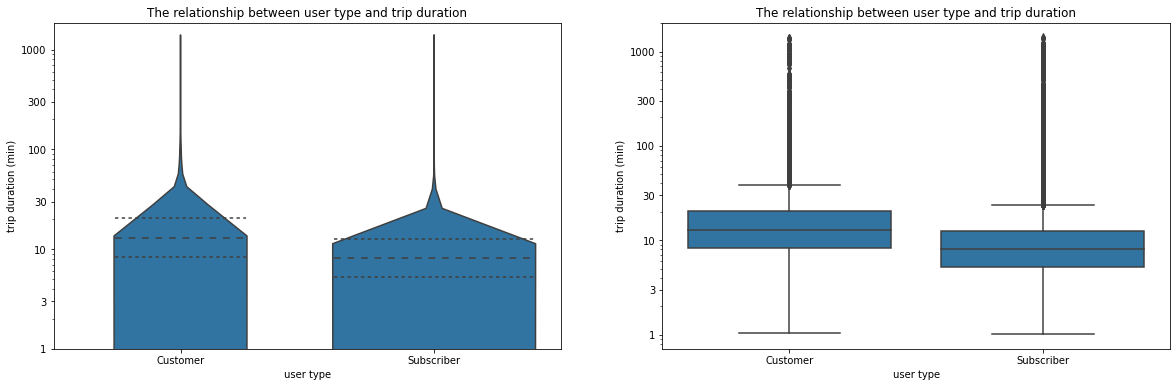

In [22]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sb.violinplot(data=ford_df,x='user_type',y='duration_min',color=sb.color_palette()[0],inner='quartile')
duration_scale("y")
plt.xlabel('user type')
plt.ylabel('trip duration (min)')
plt.title("The relationship between user type and trip duration")
plt.subplot(1,2,2)
sb.boxplot(data=ford_df,x='user_type',y='duration_min',color=sb.color_palette()[0])
duration_scale("y")
plt.ylabel('trip duration (min)')
plt.xlabel('user type')
plt.title("The relationship between user type and trip duration");

The box plot shows that trip duration for customers is bigger than subscribers in average, however the violin plot shows that the number of subscribers is significantly larger than customers.

# Multivariate exploration:

Now let's see the ratio between different genders as customers and subscribers.

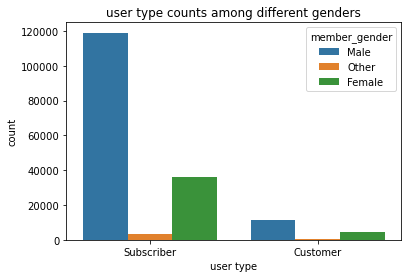

In [23]:
sb.countplot(data=ford_df, x='user_type', hue='member_gender',order=ford_df.user_type.value_counts().index)
plt.xlabel('user type')
plt.title('user type counts among different genders');

This plot shows that most dataset members are male subscribers. and that female subscribers are approximately 1/3 the male subscribers and 1/2 the male customers.

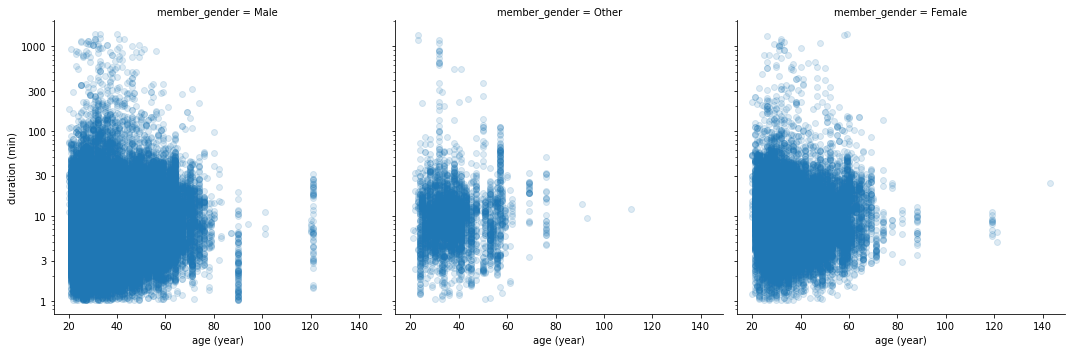

In [24]:
g = sb.FacetGrid(data = ford_df,col='member_gender', height = 5)
g.map(plt.scatter, 'age', 'duration_min', alpha=0.15)
duration_scale("y")
g.set_xlabels('age (year)')
g.set_ylabels('duration (min)');

Interestingly, there's a jump in trip duration for the (other) gender before the age of 60.